In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [6]:
# Get dataset
df_sal = pd.read_csv('Iris.csv')
df_sal.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [7]:
df_sal.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369,1.006711
std,0.828594,0.433499,1.759651,0.761292,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
df = pd.read_csv('Iris.csv', names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"], header=0)
X = df[['PetalLengthCm']].values  # Independent variable
Y = df[['PetalWidthCm']].values   # Dependent variable

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [16]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [17]:
Y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

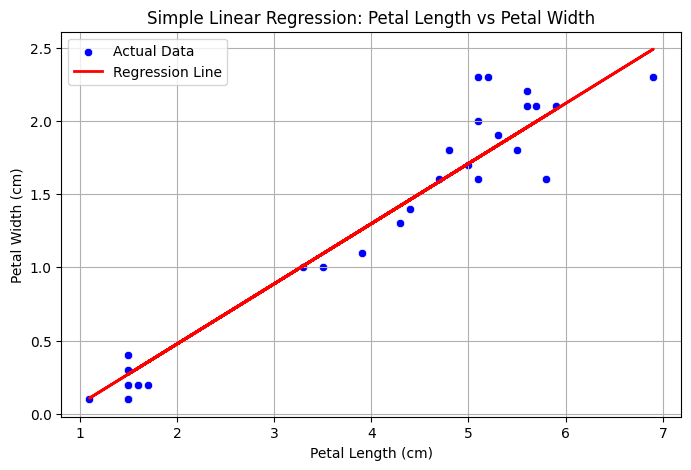

In [21]:
# Plot scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test.flatten(), y=Y_test.flatten(), label="Actual Data", color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Simple Linear Regression: Petal Length vs Petal Width")
plt.legend()
plt.grid()
plt.show()

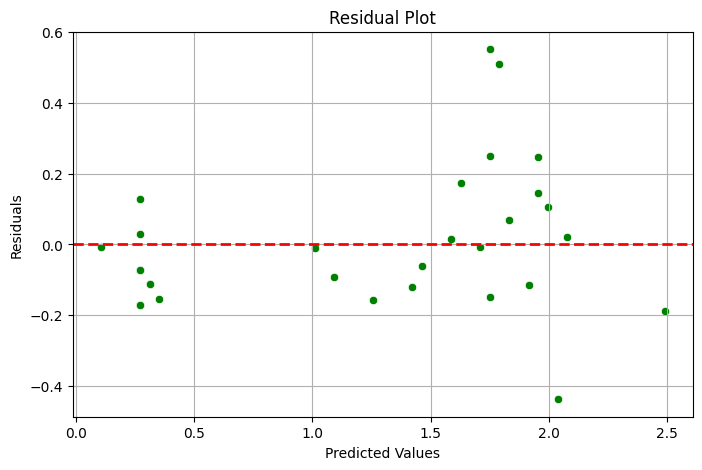

In [22]:
# Residual Plot
residuals = Y_test - Y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_pred.flatten(), y=residuals.flatten(), color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid()
plt.show()

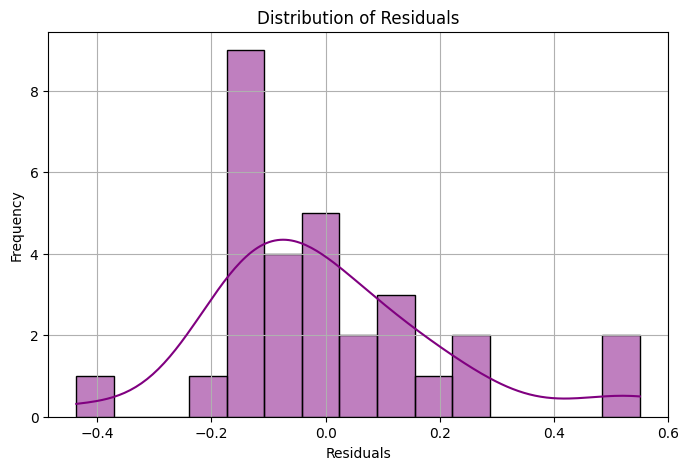

In [23]:
# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals.flatten(), bins=15, kde=True, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid()
plt.show()

In [24]:
# Print model parameters and performance metrics
print(f"Slope (m): {model.coef_[0][0]}")
print(f"Intercept (c): {model.intercept_[0]}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Slope (m): 0.4105498962679782
Intercept (c): -0.34447595515046947
Mean Squared Error (MSE): 0.040063454476926406
R-squared (R²): 0.9393345631784882
